In [5]:
from imutils import paths
from PIL import Image
import time
import foregroundextraction as extract
import os 
import matplotlib.pyplot as plt

# to reload module: uncomment use the following 
# %load_ext autoreload
# %autoreload 2


# for hash all the images in folder / database 

IMGDIR = r"../data/imagesbooks/"
IMGDIRPROCESSED = ['']*5
IMGDIRPROCESSED[0] = r"../data/imagesbooks1/"
IMGDIRPROCESSED[1] = r"../data/imagesbooks2/"
IMGDIRPROCESSED[2] = r"../data/imagesbooks3/"
IMGDIRPROCESSED[3] = r"../data/imagesbooks4/"
IMGDIRPROCESSED[4] = r"../data/imagesbooks_warp/"


# check directories, create if not exist
for dir in IMGDIRPROCESSED : 
    if not os.path.exists(os.path.dirname(dir)):
        try:
            os.makedirs(os.path.dirname(dir))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise


In [9]:
haystackPaths = list(paths.list_images(IMGDIR)) #[:2]
# print(haystackPaths)

# test
image1, image2, image3, image4, bbmap = extract.foregroundExtractAndWarp(haystackPaths[1])    # check 

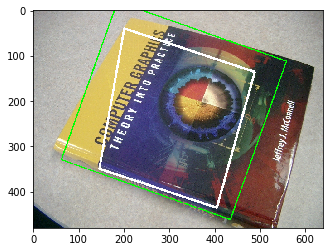

In [7]:
plt.imshow(bbmap)

In [10]:
# Run entire image set and create processed images

# time preprocessing operation 
start = time.time()
counter = 1 
for f in haystackPaths:
    
    image_orig = Image.open(f)
    # image1, image2 = extract.foregroundExtract(f)    # check 
    image1, image2, image3, image4, bbmap = extract.foregroundExtractAndWarp(f)    # check 

    img1 = Image.fromarray(image1)          # 0 filled bg                # check 
    img2 = Image.fromarray(image2)          # transparent bg             # check 
    img3 = Image.fromarray(image3)          # warped bounding box        # check 
    img4 = Image.fromarray(image4)          # warped inner bounding box  # check 
    img5 = Image.fromarray(bbmap)           # warped inner bounding box  # check 
    filename = os.path.basename(f).split('.')[0]
    img1.save( IMGDIRPROCESSED[0] + filename + '.png', format='PNG')
    img2.save( IMGDIRPROCESSED[1] + filename + '.png', format='PNG')
    img3.save( IMGDIRPROCESSED[2] + filename + '.png', format='PNG')
    img4.save( IMGDIRPROCESSED[3] + filename + '.png', format='PNG')
    img5.save( IMGDIRPROCESSED[4] + filename + '.png', format='PNG')
    print ("Processed " , counter , ' ', filename)
    counter += 1

print("[INFO] processed {} images in {:.2f} seconds".format(
len(haystackPaths), time.time() - start))

Processed  1   ukbench08011
Processed  2   ukbench05955
Processed  3   ukbench06110
Processed  4   ukbench05970
Processed  5   ukbench03060
Processed  6   ukbench10163
Processed  7   ukbench05878
Processed  8   ukbench06536
Processed  9   ukbench06001
Processed  10   ukbench05953
Processed  11   ukbench03037
Processed  12   ukbench05993
Processed  13   ukbench05980
Processed  14   ukbench09364
Processed  15   ukbench08603
Processed  16   ukbench08597
Processed  17   ukbench08010
Processed  18   ukbench05874
Processed  19   ukbench06410
Processed  20   ukbench05935
Processed  21   ukbench00458
Processed  22   ukbench06701
Processed  23   ukbench03890
Processed  24   ukbench05944
Processed  25   ukbench06700
Processed  26   ukbench05967
Processed  27   ukbench06040
Processed  28   ukbench09366
Processed  29   ukbench05991
Processed  30   ukbench05945
Processed  31   ukbench05941
Processed  32   ukbench06118
Processed  33   ukbench05985
Processed  34   ukbench08000
Processed  35   ukbench